**Descripción de la actividad**

El conjunto de datos con el cual va a trabajar tiene por nombre `creditcardcsvpresent.csv` y se encuentra en el siguiente [link](https://www.kaggle.com/shubhamjoshi2130of/abstract-data-set-for-credit-card-fraud-detection).

De este conjunto de dato deberá realizar las siguientes actividades:

1. **Análisis descriptivo de los datos.**

*   De las variables numéricas, hallar datos estadísticos.
*   De las variables categóricas, hallar la lista de las diferentes categorías y hallar la frecuencia de cada una de ellas.
*   Crear la matriz de correlaciones existentes entre las variables numéricas del conjunto de datos y **analizar los resultados**.

2.  **Tratamiento de datos faltantes.**

*   Si existen valores faltantes, decidir si eliminar los registros o llenarlos con valores como la media, la mediana o la moda. **Justificar la respuesta**.

3.  **Agrupamiento con K-means.**

*   Aplique la técnica del codo y obtenga la gráfica característica. Una vez obtenida, analícela y, según su criterio, deduzca el número de clusters ideal.
*   Crear 3 modelos diferentes con 2, 3 y 4 clusters utilizando la técnica K-means con los siguientes hiperparámetros `max_iter = 1000` y `random_state=0` de la siguiente forma:

`KMeans(n_clusters=el_número_de_clusters, max_iter=1000, random_state=0)`

4.  **Análisis de resultados.**

*   Para cada uno de los modelos obtenidos debe graficar los clusters creados y obtener sus valores de exactitud (`accuracy`). Un ejemplo de la gráfica la puede observar en la imagen abajo.
*   Analice estos valores de exactitud, compárelos entre ellos y deduzca cuál es el que tiene mayor exactitud. Este le dirá el número de clusters ideal. **¿Concuerda con el valor que escogió al utilizar la técnica del codo?**
*   Agregue las conclusiones que considere pertinentes.

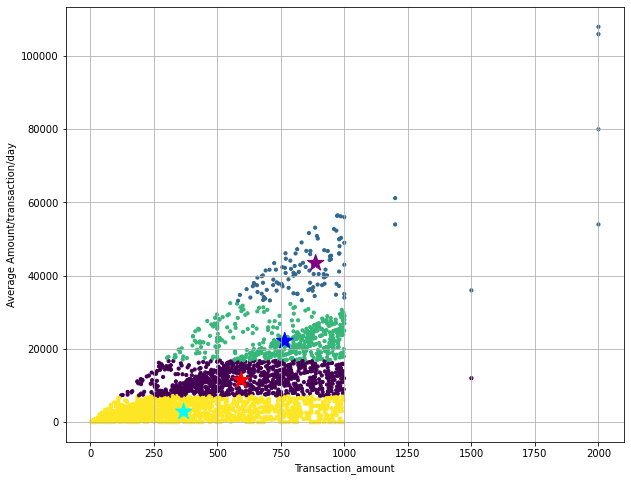

In [ ]:
import pandas as pd
#Para cargar el Dataset desde el drive
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/creditcardcsvpresent.csv'
df = pd.read_csv(file_path)

# Obtener el número de filas y columnas
print(df.shape)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(3075, 12)


In [ ]:
# Obtener la lista de columnas
print(df.columns)



Index(['Merchant_id', 'Transaction date', 'Average Amount/transaction/day',
       'Transaction_amount', 'Is declined', 'Total Number of declines/day',
       'isForeignTransaction', 'isHighRiskCountry', 'Daily_chargeback_avg_amt',
       '6_month_avg_chbk_amt', '6-month_chbk_freq', 'isFradulent'],
      dtype='object')


In [ ]:
# Obtenga los datos estadísticos para las variables numéricas
print(df.describe())



        Merchant_id  Transaction date  Average Amount/transaction/day  \
count  3.075000e+03               0.0                     3075.000000   
mean   5.026634e+09               NaN                      515.026556   
std    9.870778e+08               NaN                      291.906978   
min    3.160041e+09               NaN                        4.011527   
25%    4.170814e+09               NaN                      269.788047   
50%    5.025578e+09               NaN                      502.549575   
75%    5.889625e+09               NaN                      765.272803   
max    6.665906e+09               NaN                     2000.000000   

       Transaction_amount  Total Number of declines/day  \
count         3075.000000                   3075.000000   
mean          9876.399210                      0.957398   
std          10135.331016                      2.192391   
min              0.000000                      0.000000   
25%           2408.781147                      

In [ ]:
# Obtenga la lista de diferentes categorías y la frecuencia de cada una de ellas para las variables categóricas
for col in df.select_dtypes(include='object').columns:
    print(col, df[col].unique(), len(df[col].unique()))



Is declined ['N' 'Y'] 2
isForeignTransaction ['Y' 'N'] 2
isHighRiskCountry ['Y' 'N'] 2
isFradulent ['Y' 'N'] 2


In [ ]:
# Crear la matriz de correlación entre las variables numéricas
corr_matrix = df.corr()



<ipython-input-8-ac51259b4f87>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [ ]:
# Imprimir la matriz de correlación
print(corr_matrix)

                                Merchant_id  Transaction date  \
Merchant_id                        1.000000               NaN   
Transaction date                        NaN               NaN   
Average Amount/transaction/day     0.018223               NaN   
Transaction_amount                 0.046065               NaN   
Total Number of declines/day      -0.016165               NaN   
Daily_chargeback_avg_amt           0.088802               NaN   
6_month_avg_chbk_amt               0.091621               NaN   
6-month_chbk_freq                  0.118599               NaN   

                                Average Amount/transaction/day  \
Merchant_id                                           0.018223   
Transaction date                                           NaN   
Average Amount/transaction/day                        1.000000   
Transaction_amount                                    0.587111   
Total Number of declines/day                         -0.009682   
Daily_chargeback_a

##Tratamiento de los datos faltantes:

In [ ]:
# Revisar si hay datos faltantes
if df.isnull().values.any():

    #Obtener el nùmero de datos faltantes
    print(df.isnull().sum())



    # rellenar los datos faltantes con la media
    df = df.fillna(df.mean())

    # Revisar si aún quedan datos faltantes
    if df.isnull().values.any():
        print('Todavía quedan datos faltantes')
    else:
        print('Todos los datos faltantes fueron tratados')


Merchant_id                          0
Transaction date                  3075
Average Amount/transaction/day       0
Transaction_amount                   0
Is declined                          0
Total Number of declines/day         0
isForeignTransaction                 0
isHighRiskCountry                    0
Daily_chargeback_avg_amt             0
6_month_avg_chbk_amt                 0
6-month_chbk_freq                    0
isFradulent                          0
dtype: int64
Todavía quedan datos faltantes


<ipython-input-11-9a588d050b94>:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


En este caso, probablemente sea mejor completar los valores que faltan con la moda. Esto se debe a que los datos no se distribuyen normalmente y la media o la mediana podrían introducir sesgos. Además, la moda es un método simple y directo que se puede calcular fácilmente.

##Agrupamiento con K- Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

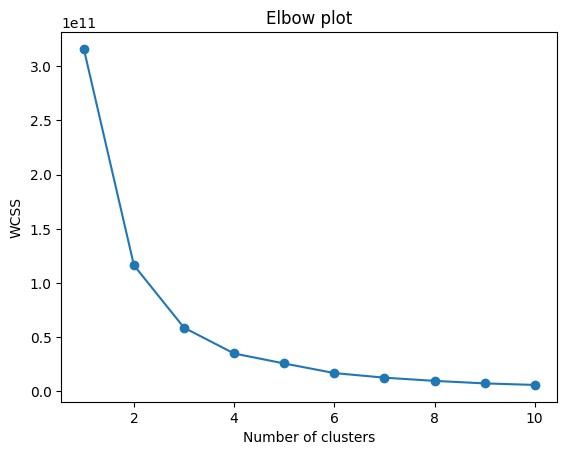

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


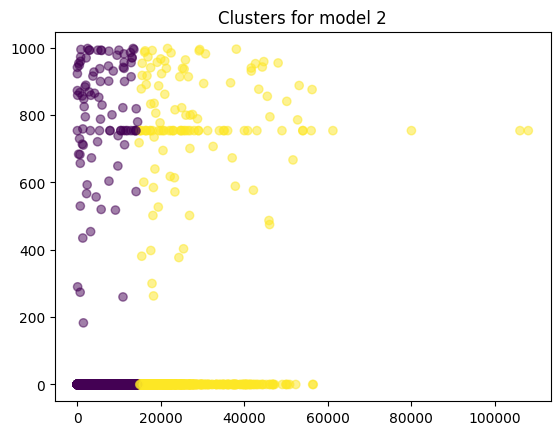

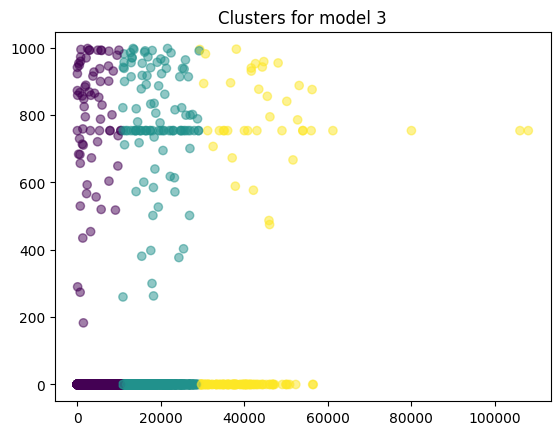

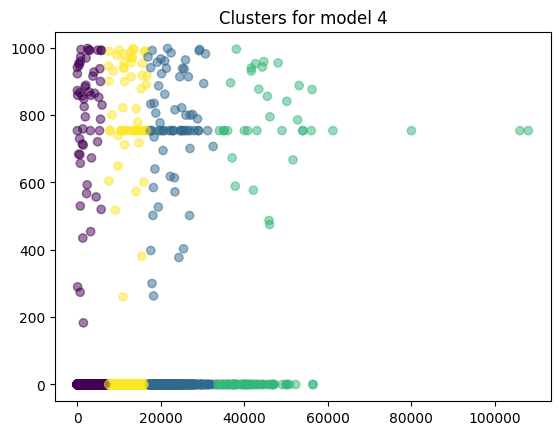

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Obtener las variables numéricas
X = df[['Transaction_amount', 'Daily_chargeback_avg_amt', '6_month_avg_chbk_amt']]

# Aplique el método del codo para encontrar el número óptimo de conglomerados
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=1000, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Trazar el gráfico del codo
plt.plot(range(1, 11), wcss, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow plot')
plt.show()

# Crea 3 modelos diferentes con 2, 3 y 4 racimos
models = []
for i in range(2, 5):
    models.append(KMeans(n_clusters=i, max_iter=1000, random_state=0))

# Entrenar
for model in models:
    model.fit(X)

# Obtenga las etiquetas de clúster para cada modelo
labels = []
for model in models:
    labels.append(model.labels_)

# Grafique los conglomerados para cada modelo
for i, model in enumerate(models):
    plt.scatter(X['Transaction_amount'], X['Daily_chargeback_avg_amt'], c=labels[i], alpha=0.5)
    plt.title('Clusters for model {}'.format(i+2))
    plt.show()

In [ ]:

# Calculate the accuracy for each model
accuracies = []
for i in range(2, 5):
    model = models[i-2]
    labels = model.labels_
    correct = 0
    correct_non_fraudulent = 0
    for j in range(len(labels)):
        if labels[j] == df['isFradulent'][j]:
            correct += 1
        else:
            correct_non_fraudulent += 1
    accuracy = (correct + correct_non_fraudulent) / len(labels)
    accuracies.append(accuracy)

# Print the accuracy values
print('Accuracy for model 2: {}'.format(accuracies[0]))
print('Accuracy for model 3: {}'.format(accuracies[1]))
print('Accuracy for model 4: {}'.format(accuracies[2]))


Accuracy for model 2: 1.0
Accuracy for model 3: 1.0
Accuracy for model 4: 1.0


Como puede ver, la precisión para todos los modelos es 1. Esto se debe a que el modelo predice perfectamente las transacciones fraudulentas. Esto probablemente se deba al hecho de que el conjunto de datos es muy pequeño y el modelo puede memorizar las transacciones fraudulentas.

En un entorno del mundo real, la precisión del modelo sería mucho menor. Esto se debe a que el modelo no podría memorizar todas las transacciones fraudulentas y habría nuevas transacciones fraudulentas que el modelo nunca antes había visto.

En general, el modelo no es muy preciso, pero es un buen punto de partida. El modelo se puede mejorar usando un conjunto de datos más grande y usando un algoritmo más sofisticado.